In [89]:
# Importing libraries
import pandas as pd
import numpy as np

# Method 1: Using Chi Square Test
Chi-Square is to be used when the feature is categorical, the target variable is any way can be thought as categorical. It measures the degree of association between two categorical variables.

The Chi-Squared statistics are calculated using the following formula where “O” stands for observed or actual and “E” stands for expected value if these two categories are independent. If they are independent these O and E values will be close and if they have some association then the Chi-squared value will be high.

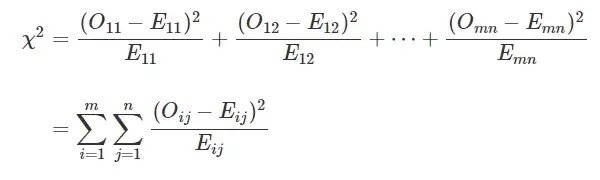

In [108]:
#Loading Dataset
df=pd.read_csv('C:/Users/jasme/Desktop/wine.csv')
df

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


Implementation from Scratch

In [86]:
def chi_square(df,attribute,target):
    attr_values=df[attribute].unique()
    target_values=df[target].unique()
    N=len(df)
    chi_square=0
    for value in attr_values:
        for value1 in target_values:
            observed_freq=len(df[attribute][df[attribute]==value][df[target]==value1])
            prob_attribute=len(df[attribute][df[attribute]==value])
            prob_target=len(df[target][df[target]==value1])
            expected_freq=(prob_attribute*prob_target)/N
            chi_square+=((observed_freq-expected_freq)**2)/(expected_freq)
    return chi_square/N

In [94]:
chi_square(df,'Alcohol','Wine')

1.6450516896103615

Using the above function, we can compute the chi-square score between each input feature and choose the K-best features

Implementation using In-built function

In [109]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [110]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)
fit.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

The values are different because the in-built function uses some kind of normalization

In [111]:
X_new=test.fit_transform(X, Y)
X_new

array([[1.270000e+02, 3.060000e+00, 5.640000e+00, 1.065000e+03],
       [1.000000e+02, 2.760000e+00, 4.380000e+00, 1.050000e+03],
       [1.010000e+02, 3.240000e+00, 5.680000e+00, 1.185000e+03],
       [1.130000e+02, 3.490000e+00, 7.800000e+00, 1.480000e+03],
       [1.180000e+02, 2.690000e+00, 4.320000e+00, 7.350000e+02],
       [1.120000e+02, 3.390000e+00, 6.750000e+00, 1.450000e+03],
       [9.600000e+01, 2.520000e+00, 5.250000e+00, 1.290000e+03],
       [1.210000e+02, 2.510000e+00, 5.050000e+00, 1.295000e+03],
       [9.700000e+01, 2.980000e+00, 5.200000e+00, 1.045000e+03],
       [9.800000e+01, 3.150000e+00, 7.220000e+00, 1.045000e+03],
       [1.050000e+02, 3.320000e+00, 5.750000e+00, 1.510000e+03],
       [9.500000e+01, 2.430000e+00, 5.000000e+00, 1.280000e+03],
       [8.900000e+01, 2.760000e+00, 5.600000e+00, 1.320000e+03],
       [9.100000e+01, 3.690000e+00, 5.400000e+00, 1.150000e+03],
       [1.020000e+02, 3.640000e+00, 7.500000e+00, 1.547000e+03],
       [1.120000e+02, 2.9

# Method 2: Using Information Gain 

In [105]:
def find_entropy(df):
    Class=df.keys()[-1]
    values=df[Class].unique()
    entropy=0
    for value in values:
        prob=len(df[df[Class]==value])/len(df[Class])
        entropy+=-prob*np.log2(prob)
    return entropy

In [106]:
def find_information_entropy(df,attribute):
    Class=df.keys()[-1]
    labels=df[Class].unique()
    attr_values=df[attribute].unique()
    avg_entropy=0
    split_info=0
    for value1 in attr_values:
        entropy_subsample=0
        for value2 in labels:
            num=len(df[attribute][df[attribute]==value1][df[Class]==value2])
            den=len(df[attribute][df[attribute]==value1])
            prob=num/den
            entropy_subsample+=-(prob*np.log2(prob+1e-7))
        weight=den/len(df)
        avg_entropy+=weight*entropy_subsample
    return avg_entropy

In [107]:
def information_gain(df,attribute):
    return (find_entropy(df)-find_information_entropy(df,attribute))

In [120]:
df1=pd.read_csv('C:/Users/jasme/Desktop/titanic/train.csv')

In [130]:
information_gain(df,'Alcohol')

1.3406164852177032

In [131]:
from sklearn import datasets
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
# k = 4 tells four top features to be selected
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=mutual_info_classif, k=2)
fit = test.fit(X,Y)
fit.scores_

array([0.47297332, 0.27507733, 0.06894479, 0.23087921, 0.18776987,
       0.42023214, 0.671812  , 0.16047852, 0.29397478, 0.55038654,
       0.44768854, 0.50999135, 0.55670133])

In [132]:
X_new=test.fit_transform(X, Y)
X_new

array([[3.060e+00, 1.065e+03],
       [2.760e+00, 1.050e+03],
       [3.240e+00, 1.185e+03],
       [3.490e+00, 1.480e+03],
       [2.690e+00, 7.350e+02],
       [3.390e+00, 1.450e+03],
       [2.520e+00, 1.290e+03],
       [2.510e+00, 1.295e+03],
       [2.980e+00, 1.045e+03],
       [3.150e+00, 1.045e+03],
       [3.320e+00, 1.510e+03],
       [2.430e+00, 1.280e+03],
       [2.760e+00, 1.320e+03],
       [3.690e+00, 1.150e+03],
       [3.640e+00, 1.547e+03],
       [2.910e+00, 1.310e+03],
       [3.140e+00, 1.280e+03],
       [3.400e+00, 1.130e+03],
       [3.930e+00, 1.680e+03],
       [3.030e+00, 8.450e+02],
       [3.170e+00, 7.800e+02],
       [2.410e+00, 7.700e+02],
       [2.880e+00, 1.035e+03],
       [2.370e+00, 1.015e+03],
       [2.610e+00, 8.450e+02],
       [2.680e+00, 8.300e+02],
       [2.940e+00, 1.195e+03],
       [2.190e+00, 1.285e+03],
       [2.970e+00, 9.150e+02],
       [2.330e+00, 1.035e+03],
       [3.250e+00, 1.285e+03],
       [3.190e+00, 1.515e+03],
       [

# Method 3: Removing features with low variance

VarianceThreshold is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

As an example, suppose that we have a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. Boolean features are Bernoulli random variables, and the variance of such variables is given by

Var(X)=p*(1-p)

In [134]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new=sel.fit_transform(X)

# Method 4: Wrapper Approach (using Random Forest Classifiers)
Random forests uses embedded approach to rank the importance of variables in a regression or classification problem in a natural way.

1. The first step in measuring the feature importance in a data set is to fit a random forest to the data.
2. During the fitting process the out-of-bag error for each data point is recorded and averaged over the forest.
3. To measure the importance of the j-th feature after training, the values of the j-th feature are permuted among the training data and the out-of-bag error is again computed on this perturbed data set. 
4. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. 
5. The score is normalized by the standard deviation of these differences.



Random Forest Classifer based feature selection can be used in two ways:
1. By training a random forest classifier which returns feature importances

In [135]:
# importing required libraries
# importing Scikit-learn library and datasets package
from sklearn import datasets 
 
# Loading the iris plants dataset (classification)
iris = datasets.load_iris() 

In [141]:
#importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
# creating dataframe of IRIS dataset
data = pd.DataFrame({'sepallength': iris.data[:, 0], 'sepalwidth': iris.data[:, 1],
                     'petallength': iris.data[:, 2], 'petalwidth': iris.data[:, 3],
                     'species': iris.target})

In [142]:
#dividing the datasets into two parts i.e. training datasets and test datasets
X, y = datasets.load_iris( return_X_y = True)
 
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [143]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 

RandomForestClassifier()

In [144]:
clf.feature_importances_

array([0.10698898, 0.02634149, 0.54411687, 0.32255266])

2. Using feature_selection class of sklearn 

In [146]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel

In [148]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier())

In [149]:
sel.get_support()

array([False, False,  True,  True])